# Introduction to Regression Analysis in Python

Regression analysis is a statistical technique that examines the relationship between two or more variables. It aims to model the underlying structure of the data in order to make predictions or understand patterns.


## Regression basics
The equation of a simple linear regression model is:

$
  y = \eta_0 + \eta_1 \cdot x + \epsilon
$

Where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $ \eta_0 $ is the intercept
- $ \eta_1 $ is the slope of the line
- $ \epsilon $ is the error term

In multiple linear regression, two or more independent variables are used to predict the value of a dependent variable. 
The general equation can be represented as:

$
    y = \eta_0 + \eta_1 \cdot x_1 + \eta_2 \cdot x_2 + \ldots + \eta_n \cdot x_n
$

It is assumed that you have the necessary background in statistics to understand the concepts of regression analysis:
- Coefficients and their significance
- R-squared value and its importance
- Other diagnostic measures

Lets use the Possum dataset to understand the concepts of regression analysis.

## Possum models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

#set working directory
%cd "/Users/jancg/Library/CloudStorage/OneDrive-StellenboschUniversity/3_LE/3_Courses/AE_772_892/"

df = pd.read_csv('data/raw/possum.csv')
df.head()

/Users/jancg/Library/CloudStorage/OneDrive-StellenboschUniversity/3_LE/3_Courses/AE_772_892


,site,pop,sex,age,headL,skullW,totalL,tailL,weight
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,245.283450
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,189.327616
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,181.293265
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,188.323322
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,201.379143


In [3]:
df.describe()

,site,age,headL,skullW,totalL,tailL,weight
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,228.063542
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,27.930954
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,179.284677
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,197.110894
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,240.261981
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,253.317802
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,271.395092


In [5]:
correlation_matrix = df[['age', 'headL', 'skullW', 'totalL', 'tailL','weight']].corr()
print(correlation_matrix)

             age     headL    skullW    totalL     tailL    weight
age     1.000000  0.319022  0.285107  0.260280  0.118241 -0.137854
headL   0.319022  1.000000  0.710827  0.691094  0.287429 -0.117493
skullW  0.285107  0.710827  1.000000  0.526413  0.255921 -0.090976
totalL  0.260280  0.691094  0.526413  1.000000  0.565646 -0.454544
tailL   0.118241  0.287429  0.255921  0.565646  1.000000 -0.212263
weight -0.137854 -0.117493 -0.090976 -0.454544 -0.212263  1.000000


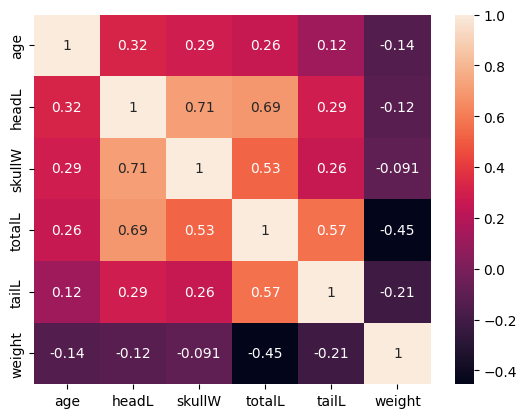

In [6]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

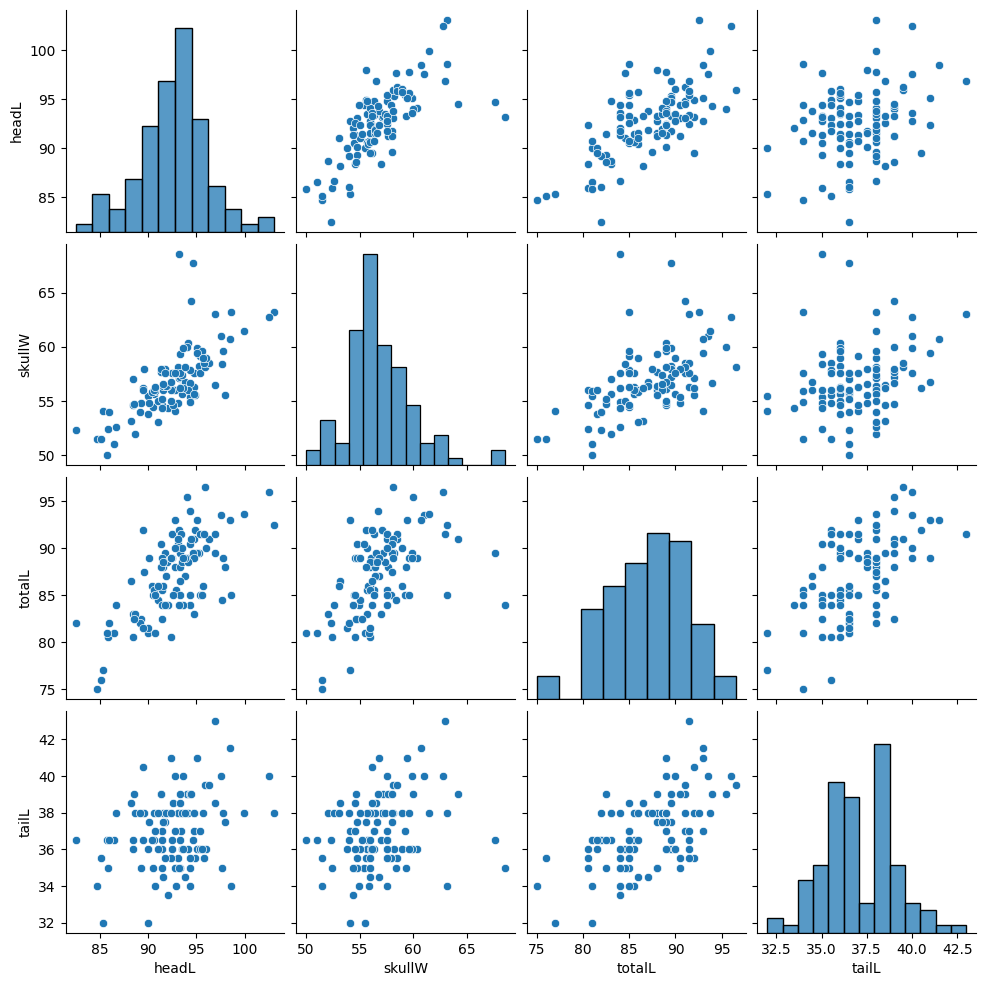

In [12]:
sns.pairplot(df, vars = ['headL','skullW','totalL','tailL'	])
plt.show()

## Model fitting

### Functional form

Lets test for functional forms first, starting skull width.

In [11]:
# Add transformed versions of the variable to the DataFrame
df['skullW_log'] = np.log(df['skullW'])
df['skullW_exp'] = np.exp(df['skullW'])
df['skullW_sq'] = np.square(df['skullW'])

# Fit the models
model_linear = smf.ols('totalL ~ skullW', data=df).fit()
model_log = smf.ols('totalL ~ skullW_log', data=df).fit()
model_exp = smf.ols('totalL ~ skullW_exp', data=df).fit()
model_sq = smf.ols('totalL ~ skullW_sq', data=df).fit()

# Compare the models
print('Linear Model AIC:', model_linear.aic)
print('Log Model AIC:', model_log.aic)
print('Exponential Model AIC:', model_exp.aic)
print('Quadratic Model AIC:', model_sq.aic)

Linear Model AIC: 568.2881159208453
Log Model AIC: 565.6748681690614
Exponential Model AIC: 1224.782050977316
Quadratic Model AIC: 571.0031412094845


Lets look at head length next.

In [12]:
# Add transformed versions of the variable to the DataFrame
df['headL_log'] = np.log(df['headL'])
df['headL_exp'] = np.exp(df['headL'])
df['headL_sq'] = np.square(df['headL'])

# Fit the models
model_linear = smf.ols('totalL ~ skullW', data=df).fit()
model_log = smf.ols('totalL ~ headL_log', data=df).fit()
model_exp = smf.ols('totalL ~ headL_exp', data=df).fit()
model_sq = smf.ols('totalL ~ headL_sq', data=df).fit()

# Compare the models
print('Linear Model AIC:', model_linear.aic)
print('Log Model AIC:', model_log.aic)
print('Exponential Model AIC:', model_exp.aic)
print('Quadratic Model AIC:', model_sq.aic)

Linear Model AIC: 568.2881159208453
Log Model AIC: 533.4033261833342
Exponential Model AIC: 1224.0922634479532
Quadratic Model AIC: 535.7971775036139


Finally, lets look at total length.

In [20]:
# Add transformed versions of the variable to the DataFrame
df['tailL_log'] = np.log(df['tailL'])
df['tailL_exp'] = np.exp(df['tailL'])
df['tailL_sq'] = np.square(df['tailL'])

# Fit the models
model_linear = smf.ols('totalL ~ tailL', data=df).fit()
model_log = smf.ols('totalL ~ tailL_log', data=df).fit()
model_exp = smf.ols('totalL ~ tailL_exp', data=df).fit()
model_sq = smf.ols('totalL ~ tailL_sq', data=df).fit()

# Compare the models
print('Linear Model AIC:', model_linear.aic)
print('Log Model AIC:', model_log.aic)
print('Exponential Model AIC:', model_exp.aic)
print('Quadratic Model AIC:', model_sq.aic)

Linear Model AIC: 561.9339831531297
Log Model AIC: 561.6961861793071
Exponential Model AIC: 1221.5407676531468
Quadratic Model AIC: 562.3197254854892


## Multicollinearity

It is problematic if the independent variables are correlated with each other. This is called multicollinearity. Lets check for multicollinearity in our model.

In [24]:
# Fit the models
model_head_skull = smf.ols('headL ~ skullW', data=df).fit()
model_head_tail = smf.ols('headL ~ tailL', data=df).fit()

print(model_head_skull.summary())

                            OLS Regression Results                            
Dep. Variable:                  headL   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.84e-17
Time:                        12:26:24   Log-Likelihood:                -242.92
No. Observations:                 104   AIC:                             489.8
Df Residuals:                     102   BIC:                             495.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1954      4.554     10.145      0.0

In [25]:
print(model_head_tail.summary())

                            OLS Regression Results                            
Dep. Variable:                  headL   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     9.186
Date:                Mon, 16 Oct 2023   Prob (F-statistic):            0.00309
Time:                        12:26:28   Log-Likelihood:                -275.03
No. Observations:                 104   AIC:                             554.1
Df Residuals:                     102   BIC:                             559.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.2042      6.409     11.421      0.0

### Final model

Now we have sufficient information to build our final model.

In [51]:
model_1 = smf.ols('totalL ~ headL_log', data=df).fit()
model_2 = smf.ols('totalL ~ skullW_log', data=df).fit()
model_3 = smf.ols('totalL ~ tailL', data=df).fit()
model_4 = smf.ols('totalL ~ headL_log + skullW_log + headL_log:skullW_log', data=df).fit()
model_5 = smf.ols('totalL ~ headL_log + skullW_log + headL_log:skullW_log + age', data=df).fit()
model_6 = smf.ols('totalL ~ headL_log + skullW_log + headL_log:skullW_log + C(sex)', data=df).fit()
model_7 = smf.ols('totalL ~ headL_log + skullW_log + headL_log:skullW_log + C(site)', data=df).fit()
model_8 = smf.ols('totalL ~ headL_log + skullW_log + headL_log:skullW_log + tailL + C(site)', data=df).fit()
model_9 = smf.ols('totalL ~ headL_log + tailL + C(site)', data=df).fit()

print('Model 1 - AIC:', model_1.aic)
print('Model 2 - AIC:', model_2.aic)
print('Model 3 - AIC:', model_3.aic)
print('Model 4 - AIC:', model_4.aic)
print('Model 5 - AIC:', model_5.aic)
print('Model 6 - AIC:', model_6.aic)
print('Model 7 - AIC:', model_7.aic)
print('Model 8 - AIC:', model_8.aic)
print('Model 9 - AIC:', model_9.aic)

Model 1 - AIC: 533.4033261833342
Model 2 - AIC: 565.6748681690614
Model 3 - AIC: 561.9339831531297
Model 4 - AIC: 533.6894253520302
Model 5 - AIC: 525.7577435729937
Model 6 - AIC: 526.469594036723
Model 7 - AIC: 506.17443437270174
Model 8 - AIC: 442.5214086109795
Model 9 - AIC: 443.4601398808436


In [41]:
print(model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                 totalL   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     41.96
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.72e-30
Time:                        12:37:46   Log-Likelihood:                -210.26
No. Observations:                 104   AIC:                             442.5
Df Residuals:                      93   BIC:                             471.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2757.9390 

### Saving model outputs

Latex:

In [47]:
# Create a dictionary with the information you want to place at the bottom of the table
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4',
                                         'Model 5',
                                         'Model 6',
                                         'Model 7',
                                         'Model 8',
                                         'Model 9'],
                            info_dict=info_dict,
                            regressor_order=['Intercept',
                                             'headL_log',
                                             'skullW_log',
                                             'headL_log:skullW_log',
                                             'tailL',
                                             'age'])

results_table.add_title('Table - OLS Regressions')

print(results_table.as_latex())

html_output = results_table.as_html()


\begin{table}
\caption{Table - OLS Regressions}
\label{}
\begin{center}
\begin{tabular}{llllllllll}
\hline
                       & Model 1      & Model 2     & Model 3    & Model 4     & Model 5     & Model 6     & Model 7      & Model 8     & Model 9       \\
\hline
Intercept              & -263.2458*** & -89.4506*** & 41.0371*** & -3983.4669* & -3467.5448  & -2300.0646  & -4944.5410** & -2757.9390* & -158.5421***  \\
                       & (35.8817)    & (27.0216)   & (6.6568)   & (2144.9217) & (2390.7473) & (2135.8135) & (2116.7004)  & (1570.7423) & (28.6775)     \\
headL\_log             & 77.3778***   &             &            & 891.8331*   & 778.8082    & 520.8321    & 1103.5613**  & 613.0557*   & 45.2151***    \\
                       & (7.9248)     &             &            & (473.0054)  & (526.9068)  & (470.9772)  & (467.5066)   & (347.0528)  & (6.4285)      \\
skullW\_log            &              & 43.7025***  &            & 932.1537*   & 805.2912    & 511.3745    & 11

HTML for opening in browser or Word:

In [49]:
# Write the HTML summary to a file
filepath = 'reports/regression_results_table.html'
with open(filepath, "w") as file:
    file.write(html_output)

## Tutorial 9 

Using the a similar workflow, construct a model to predict the weight of the possums.